<a href="https://colab.research.google.com/github/KOYALborbora/AI-image-generation-/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
safety_checker/model.safetensors not found
Keyword arguments {'use_auth_token': 'your_huggingface_auth_token'} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Enter your prompt: chicken in river


  0%|          | 0/50 [00:00<?, ?it/s]

odict_keys(['images', 'nsfw_content_detected'])


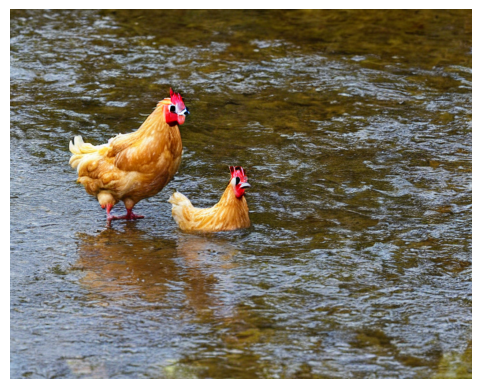

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

auth_token = "your_huggingface_auth_token"

modelid = "CompVis/stable-diffusion-v1-4"
device = "cuda"
pipe = StableDiffusionPipeline.from_pretrained(modelid, revision="fp16", torch_dtype=torch.float16, use_auth_token=auth_token)
pipe.to(device)

prompt = input("Enter your prompt: ")
with autocast(device):
    output = pipe(prompt, guidance_scale=10,width = 800, height = 640)

print(output.keys())  # Print the keys of the output dictionary to identify the correct key

# Assuming the key is 'images' based on the latest API changes
image = output["images"][0]

# Save and display the generated image
image.save('generatedimage.png')
img = Image.open('generatedimage.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
!pip install diffusers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.5 MB/s eta 0:00:00
